In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_sample_weight

# 1. Load dataset
df = pd.read_csv("/content/drive/MyDrive/dataset/Feature Engineering - updated.csv - SLU Opportunity Wise Data .csv")

# 2. Define features and target
features = [
    "Age Group", "Gender", "Country", "Current/ Intended Majors",
    "Opportunity_Duration_Days", "Application_Processing_Time", "Days to apply"
]
target = "Status Description"
X = df[features].copy()
y = df[target]

# 3. Encode categorical features
label_encoders = {}
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

# 4. Handle missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# 5. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Compute sample weights to address class imbalance
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# 7. Train Gradient Boosting model with weights
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train, sample_weight=sample_weights)

# 8. Evaluate on test set
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)

# 9. Print performance metrics
print("✅ Model Performance Metrics:\n")
print(report)


✅ Model Performance Metrics:

                precision    recall  f1-score   support

       Applied       0.50      0.85      0.63        20
   Dropped Out       0.35      0.82      0.49       136
      Rejected       0.88      0.81      0.84       693
 Rewards Award       0.10      0.50      0.17         6
       Started       0.96      0.97      0.97       156
Team Allocated       0.93      0.59      0.72       662
    Waitlisted       0.49      0.95      0.65        21
      Withdraw       0.08      0.33      0.13        18

      accuracy                           0.74      1712
     macro avg       0.54      0.73      0.57      1712
  weighted avg       0.84      0.74      0.76      1712



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import classification_report

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# 1. Load dataset
df = pd.read_csv("/content/drive/MyDrive/dataset/Feature Engineering - updated.csv - SLU Opportunity Wise Data .csv")

# 2. Select features and target
features = [
    "Age Group", "Gender", "Country", "Current/ Intended Majors",
    "Opportunity_Duration_Days", "Application_Processing_Time", "Days to apply"
]
target = "Status Description"

X = df[features].copy()
y = df[target]

# 3. Encode categorical features
label_encoders = {}
for col in X.select_dtypes(include="object").columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

# 4. Handle missing values
imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)

# 5. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Compute class weights
sample_weights = compute_sample_weight(class_weight="balanced", y=y_train)

# 7. Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
}

# 8. Evaluate each model
results = []
for name, model in models.items():
    if name == "Gradient Boosting":
        model.fit(X_train, y_train, sample_weight=sample_weights)
    else:
        model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)

    results.append({
        "Model": name,
        "Accuracy": round(report["accuracy"], 3),
        "Precision (avg)": round(report["weighted avg"]["precision"], 3),
        "Recall (avg)": round(report["weighted avg"]["recall"], 3),
        "F1 Score (avg)": round(report["weighted avg"]["f1-score"], 3),
    })

# 9. Show comparison table
results_df = pd.DataFrame(results)
print("\n✅ Model Evaluation Results:\n")
print(results_df.to_string(index=False))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre


✅ Model Evaluation Results:

              Model  Accuracy  Precision (avg)  Recall (avg)  F1 Score (avg)
Logistic Regression     0.630            0.570         0.630           0.580
K-Nearest Neighbors     0.796            0.788         0.796           0.786
      Decision Tree     0.788            0.786         0.788           0.786
      Random Forest     0.811            0.800         0.811           0.803
  Gradient Boosting     0.735            0.844         0.735           0.764


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import classification_report

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier  # For Neural Network

# 1. Load dataset
df = pd.read_csv("/content/drive/MyDrive/dataset/Feature Engineering - updated.csv - SLU Opportunity Wise Data .csv")

# 2. Select features and target
features = [
    "Age Group", "Gender", "Country", "Current/ Intended Majors",
    "Opportunity_Duration_Days", "Application_Processing_Time", "Days to apply"
]
target = "Status Description"

X = df[features].copy()
y = df[target]

# 3. Encode categorical features
label_encoders = {}
for col in X.select_dtypes(include="object").columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

# 4. Handle missing values
imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)

# 5. Scale features for SVM and Neural Networks
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 6. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Compute class weights
sample_weights = compute_sample_weight(class_weight="balanced", y=y_train)

# 8. Define models including new ones
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC(kernel='rbf', probability=True),
    "Naive Bayes": GaussianNB(),
    "Neural Network (MLP)": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42),
}

# 9. Evaluate each model
results = []
for name, model in models.items():
    if name == "Gradient Boosting":
        model.fit(X_train, y_train, sample_weight=sample_weights)
    else:
        model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)

    results.append({
        "Model": name,
        "Accuracy": round(report["accuracy"], 3),
        "Precision (avg)": round(report["weighted avg"]["precision"], 3),
        "Recall (avg)": round(report["weighted avg"]["recall"], 3),
        "F1 Score (avg)": round(report["weighted avg"]["f1-score"], 3),
    })

# 10. Show comparison table
results_df = pd.DataFrame(results)
print("\n✅ Model Evaluation Results:\n")
print(results_df.to_string(index=False))

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m


✅ Model Evaluation Results:

                 Model  Accuracy  Precision (avg)  Recall (avg)  F1 Score (avg)
   Logistic Regression     0.644            0.585         0.644           0.597
   K-Nearest Neighbors     0.698            0.690         0.698           0.685
         Decision Tree     0.786            0.783         0.786           0.784
         Random Forest     0.812            0.800         0.812           0.803
     Gradient Boosting     0.735            0.844         0.735           0.764
Support Vector Machine     0.675            0.638         0.675           0.624
           Naive Bayes     0.690            0.673         0.690           0.638
  Neural Network (MLP)     0.796            0.779         0.796           0.785


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import classification_report

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier  # For Neural Network

# 1. Load dataset
df = pd.read_csv("/content/drive/MyDrive/dataset/Feature Engineering - updated.csv - SLU Opportunity Wise Data .csv")

# 2. Select features and target
features = [
    "Age Group", "Gender", "Country", "Current/ Intended Majors",
    "Opportunity_Duration_Days", "Application_Processing_Time", "Days to apply"
]
target = "Status Description"

X = df[features].copy()
y = df[target]

# 3. Encode categorical features
label_encoders = {}
for col in X.select_dtypes(include="object").columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

# 4. Handle missing values
imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)

# 5. Scale features for SVM and Neural Networks
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 6. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Compute class weights
sample_weights = compute_sample_weight(class_weight="balanced", y=y_train)

# 8. Define models including new ones
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC(kernel='rbf', probability=True),
    "Naive Bayes": GaussianNB(),
    "Neural Network (MLP)": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42),
}

# 9. Evaluate each model
results = []
for name, model in models.items():
    print(f"\n✅ Evaluating {name}...\n")

    if name == "Gradient Boosting":
        model.fit(X_train, y_train, sample_weight=sample_weights)
    else:
        model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # Print full classification report
    report = classification_report(y_test, y_pred, digits=3)
    print(report)

    # Extract metrics for comparison table
    report_dict = classification_report(y_test, y_pred, output_dict=True)
    results.append({
        "Model": name,
        "Accuracy": round(report_dict["accuracy"], 3),
        "Precision (avg)": round(report_dict["weighted avg"]["precision"], 3),
        "Recall (avg)": round(report_dict["weighted avg"]["recall"], 3),
        "F1 Score (avg)": round(report_dict["weighted avg"]["f1-score"], 3),
    })

# 10. Show comparison table
results_df = pd.DataFrame(results)
print("\n✅ Model Evaluation Results:\n")
print(results_df.to_string(index=False))


✅ Evaluating Logistic Regression...



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

                precision    recall  f1-score   support

       Applied      0.000     0.000     0.000        20
   Dropped Out      0.000     0.000     0.000       136
      Rejected      0.581     0.886     0.702       693
 Rewards Award      0.000     0.000     0.000         6
       Started      0.925     0.949     0.937       156
Team Allocated      0.687     0.514     0.588       662
    Waitlisted      0.000     0.000     0.000        21
      Withdraw      0.000     0.000     0.000        18

      accuracy                          0.644      1712
     macro avg      0.274     0.294     0.278      1712
  weighted avg      0.585     0.644     0.597      1712


✅ Evaluating K-Nearest Neighbors...



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

                precision    recall  f1-score   support

       Applied      0.200     0.050     0.080        20
   Dropped Out      0.380     0.360     0.370       136
      Rejected      0.691     0.860     0.767       693
 Rewards Award      0.000     0.000     0.000         6
       Started      0.885     0.936     0.910       156
Team Allocated      0.743     0.600     0.664       662
    Waitlisted      0.333     0.238     0.278        21
      Withdraw      0.500     0.056     0.100        18

      accuracy                          0.698      1712
     macro avg      0.467     0.387     0.396      1712
  weighted avg      0.690     0.698     0.685      1712


✅ Evaluating Decision Tree...

                precision    recall  f1-score   support

       Applied      0.591     0.650     0.619        20
   Dropped Out      0.415     0.397     0.406       136
      Rejected      0.842     0.886     0.864       693
 Rewards Award      0.125     0.167     0.143         6
       Start

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

                precision    recall  f1-score   support

       Applied      0.929     0.650     0.765        20
   Dropped Out      0.500     0.368     0.424       136
      Rejected      0.841     0.906     0.872       693
 Rewards Award      0.000     0.000     0.000         6
       Started      0.962     0.981     0.971       156
Team Allocated      0.790     0.802     0.796       662
    Waitlisted      0.857     0.571     0.686        21
      Withdraw      0.500     0.167     0.250        18

      accuracy                          0.812      1712
     macro avg      0.672     0.556     0.595      1712
  weighted avg      0.800     0.812     0.803      1712


✅ Evaluating Gradient Boosting...

                precision    recall  f1-score   support

       Applied      0.500     0.850     0.630        20
   Dropped Out      0.347     0.816     0.487       136
      Rejected      0.879     0.808     0.842       693
 Rewards Award      0.100     0.500     0.167         6
       S

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

                precision    recall  f1-score   support

       Applied      0.000     0.000     0.000        20
   Dropped Out      0.000     0.000     0.000       136
      Rejected      0.589     0.964     0.731       693
 Rewards Award      0.000     0.000     0.000         6
       Started      0.920     0.962     0.940       156
Team Allocated      0.816     0.509     0.627       662
    Waitlisted      0.000     0.000     0.000        21
      Withdraw      0.000     0.000     0.000        18

      accuracy                          0.675      1712
     macro avg      0.291     0.304     0.287      1712
  weighted avg      0.638     0.675     0.624      1712


✅ Evaluating Naive Bayes...

                precision    recall  f1-score   support

       Applied      1.000     0.050     0.095        20
   Dropped Out      0.000     0.000     0.000       136
      Rejected      0.636     0.999     0.777       693
 Rewards Award      0.000     0.000     0.000         6
       Started

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

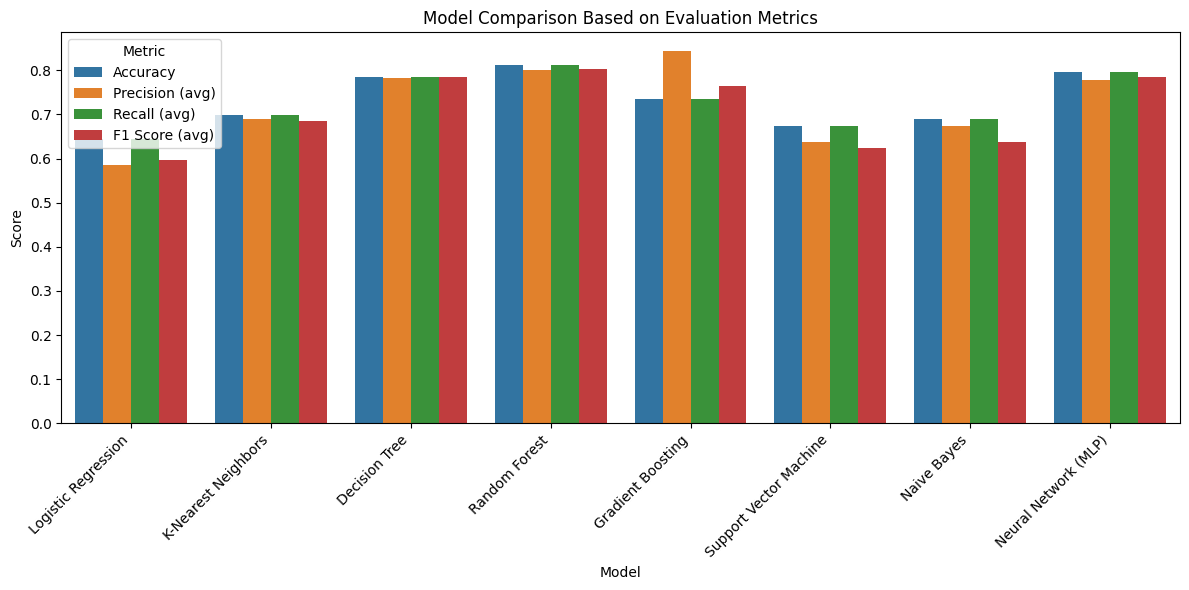

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create a DataFrame with the model evaluation results
data = {
    'Model': [
        'Logistic Regression',
        'K-Nearest Neighbors',
        'Decision Tree',
        'Random Forest',
        'Gradient Boosting',
        'Support Vector Machine',
        'Naive Bayes',
        'Neural Network (MLP)'
    ],
    'Accuracy': [0.644, 0.698, 0.786, 0.812, 0.735, 0.675, 0.690, 0.796],
    'Precision (avg)': [0.585, 0.690, 0.783, 0.800, 0.844, 0.638, 0.673, 0.779],
    'Recall (avg)': [0.644, 0.698, 0.786, 0.812, 0.735, 0.675, 0.690, 0.796],
    'F1 Score (avg)': [0.597, 0.685, 0.784, 0.803, 0.764, 0.624, 0.638, 0.785]
}

# Convert the data into a pandas DataFrame
df = pd.DataFrame(data)

# Step 2: Melt the DataFrame to make it suitable for plotting
df_melted = df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Step 3: Create a grouped bar plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=df_melted)
plt.title('Model Comparison Based on Evaluation Metrics')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

<ipython-input-9-64c740f7fdb8>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")


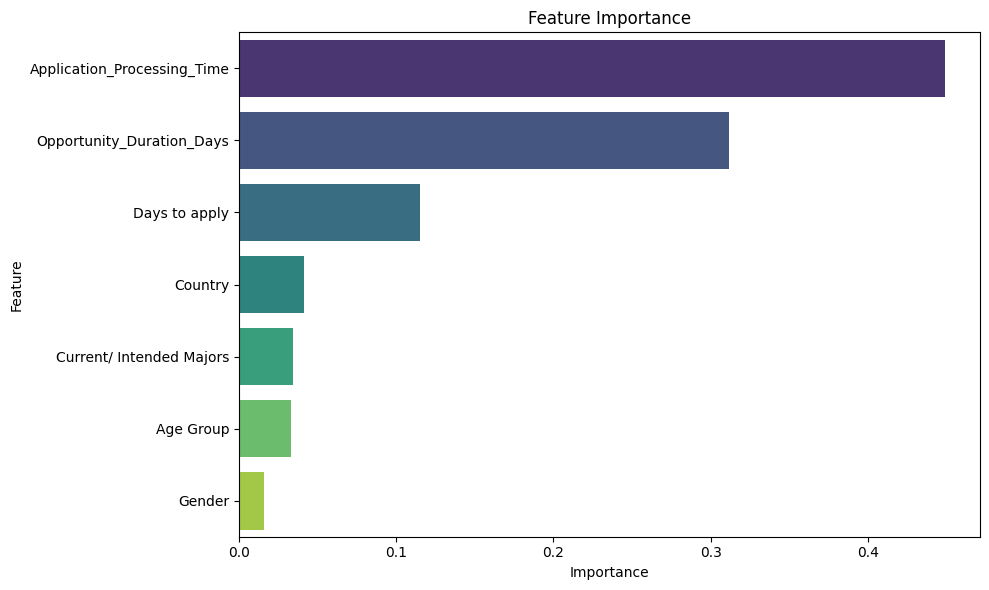


Top Features by Importance:
                       Feature  Importance
5  Application_Processing_Time    0.448951
4    Opportunity_Duration_Days    0.311837
6                Days to apply    0.114909
2                      Country    0.041412
3     Current/ Intended Majors    0.034487
0                    Age Group    0.032762
1                       Gender    0.015642


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# 1. Load dataset
df = pd.read_csv("/content/drive/MyDrive/dataset/Feature Engineering - updated.csv - SLU Opportunity Wise Data .csv")

# 2. Select features and target
features = [
    "Age Group", "Gender", "Country", "Current/ Intended Majors",
    "Opportunity_Duration_Days", "Application_Processing_Time", "Days to apply"
]
target = "Status Description"

X = df[features].copy()
y = df[target]

# 3. Encode categorical features
label_encoders = {}
for col in X.select_dtypes(include="object").columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

# 4. Handle missing values
imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)

# 5. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Train a model that supports feature importance
model = RandomForestClassifier(n_estimators=100, random_state=42)
# Or try: model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 7. Get feature importances
importances = model.feature_importances_
feature_names = features

# Create DataFrame for visualization
feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# 8. Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

# Optional: Print top features
print("\nTop Features by Importance:")
print(feature_importance_df)